##### `Simple Linear Regression`

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [16]:
#Step-1: Data Ingestion
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head(1)

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.2,136897.8,471784.1,New York,192261.83


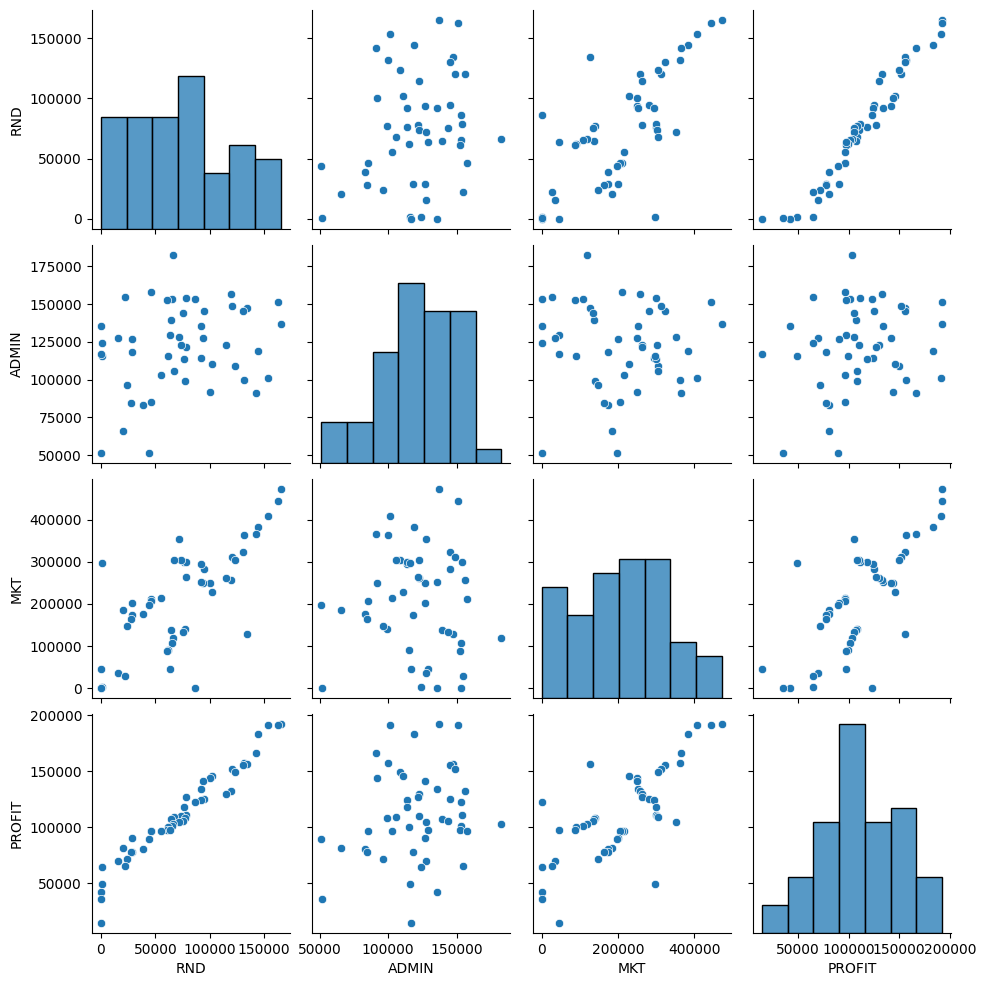

In [17]:
import seaborn as sns
sns.pairplot(df)

In [18]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


In [20]:
# Target : PROFIT, Feature: RND
#Step-2: Separate X and Y
X = df[['RND']]
Y = df['PROFIT']

In [22]:
#Step-3: Build Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
print(f'Linear Regression Model Coefficient: {model.coef_}')
print(f'Linear Regression Model Intercept: {model.intercept_}')


Linear Regression Model Coefficient: [0.85429137]
Linear Regression Model Intercept: 49032.89914125215


In [24]:
#Step-4: Out of sample Prediction
rnd = 70000
ypred = model.predict([[rnd]])
print(f'Linear Regression Predicted Value of [PROFIT] for RND value:{rnd} is: {ypred}')

Linear Regression Predicted Value of [PROFIT] for RND value:70000 is: [108833.29510697]


In [25]:
#Step-5: Evaluate Model
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f'[RMSE: {rmse:.2f}| MAE:{mae:.2f}| MAPE: {mape:.2%}| R2_SCORE: {r2:.2%}]')

evaluate_model(model, X, Y)


[RMSE: 9226.10| MAE:6910.98| MAPE: 11.07%| R2_SCORE: 94.65%]
